YOLOR 🚀 v0.1-154-gdfbf308 torch 2.0.1+cu117 CPU



Fusing layers... 
IDetect.fuse


Model Summary: 343 layers, 6175567 parameters, 0 gradients, 13.3 GFLOPS


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

INFER
OK TRACE


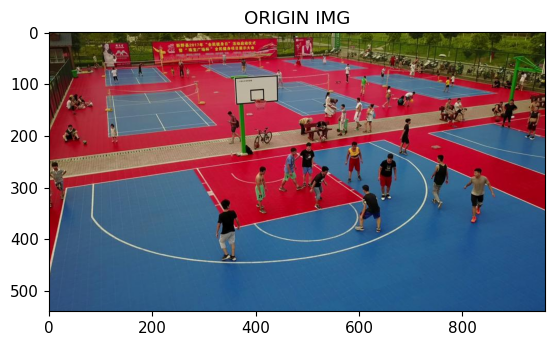

CBAM torch.Size([1, 256, 24, 40])
(384, 640, 3)


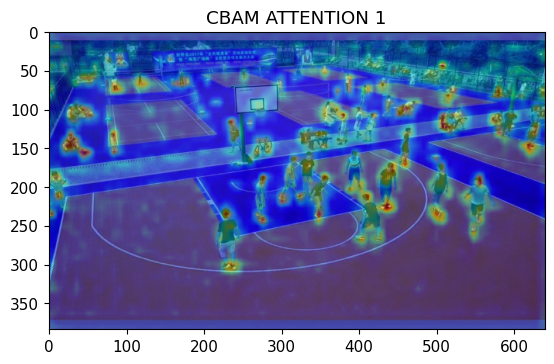

(384, 640, 3)


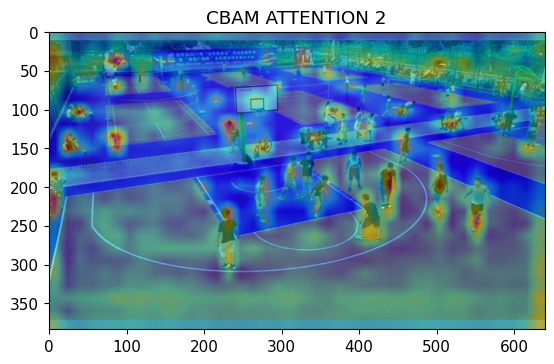

INFER
OK TRACE


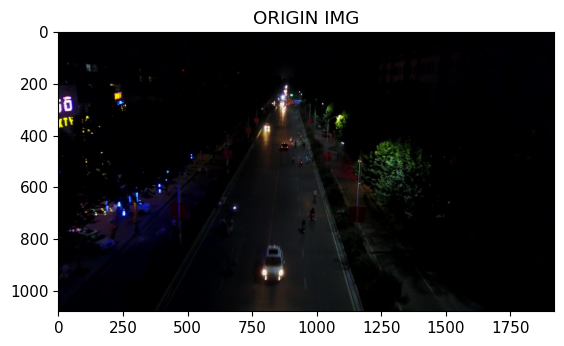

CBAM torch.Size([1, 256, 24, 40])
(384, 640, 3)


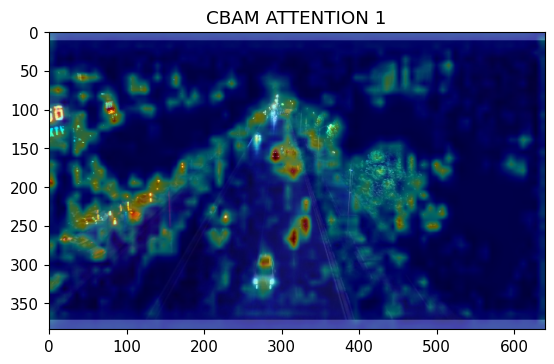

(384, 640, 3)


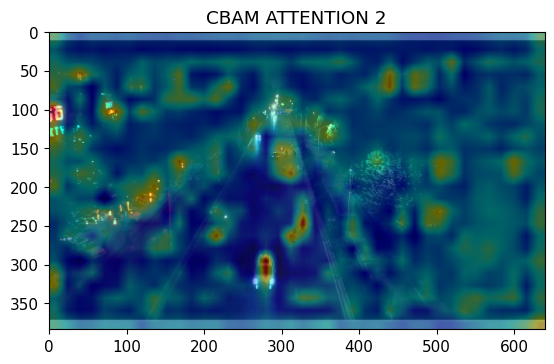

INFER
OK TRACE


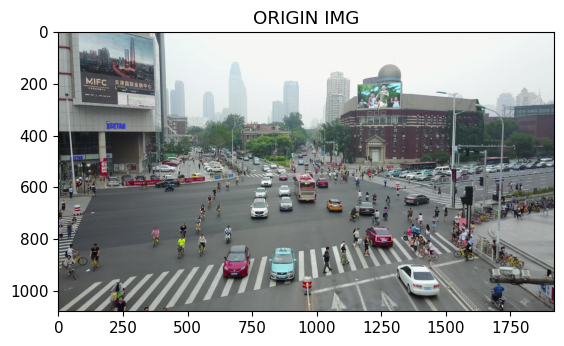

CBAM torch.Size([1, 256, 24, 40])
(384, 640, 3)


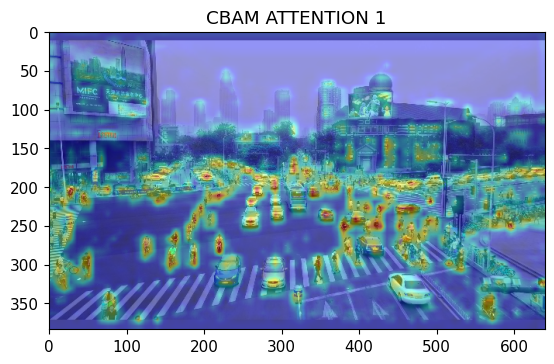

(384, 640, 3)


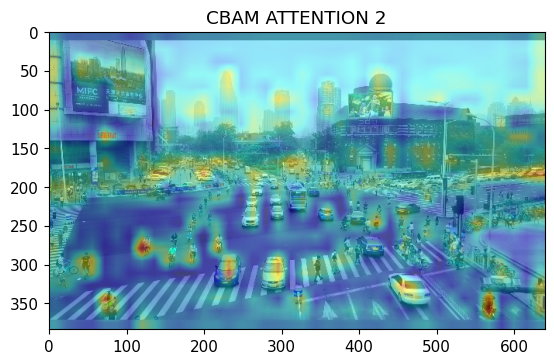

INFER
OK TRACE


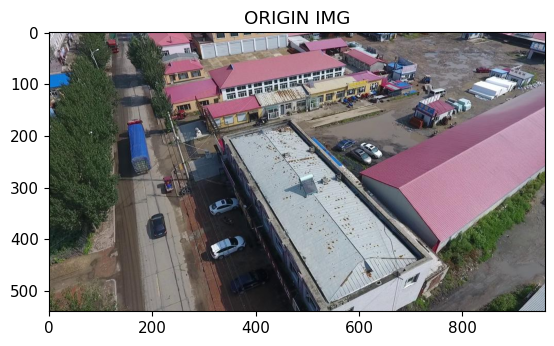

CBAM torch.Size([1, 256, 24, 40])
(384, 640, 3)


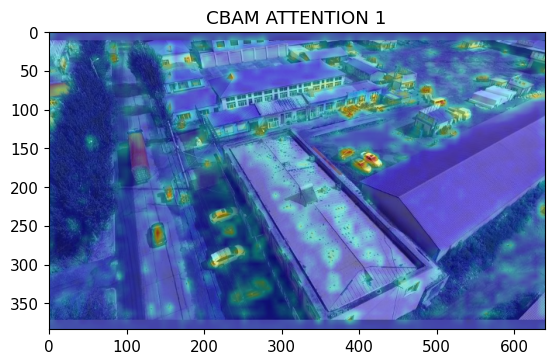

(384, 640, 3)


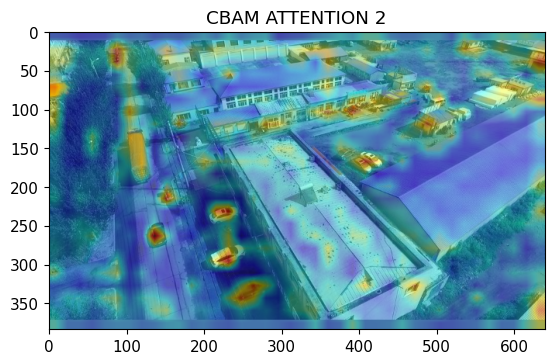

INFER
OK TRACE


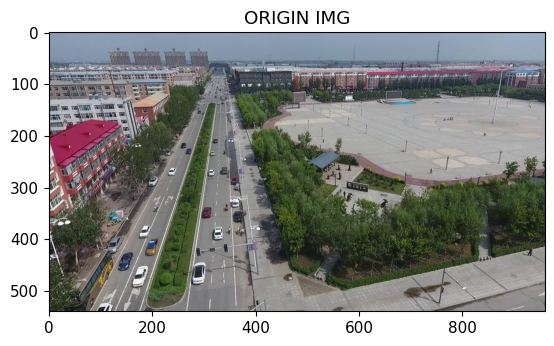

CBAM torch.Size([1, 256, 24, 40])
(384, 640, 3)


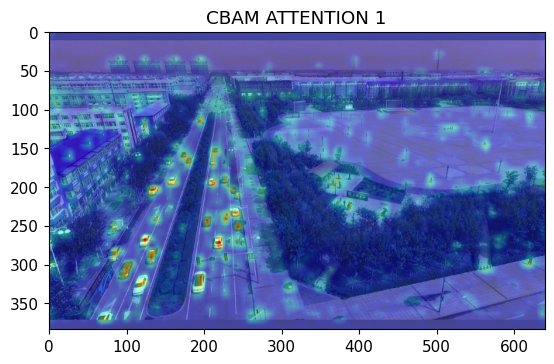

(384, 640, 3)


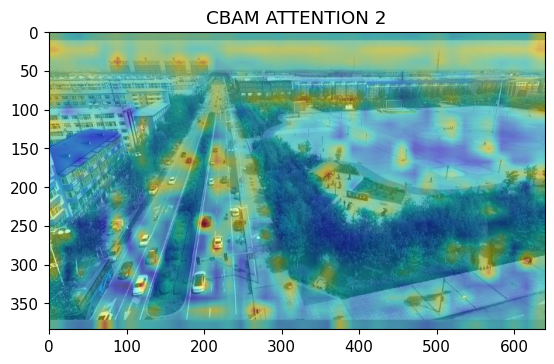

Done. (10.297s)


In [2]:
import argparse
import time
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel
# from models.common import CBAM
import matplotlib.pyplot as plt
import torchvision
from utils.plots import visualize_single_cbam_attention
import cv2

%matplotlib inline

def detect(save_img=False):
    source, weights, view_img, save_txt, imgsz, trace = opt.source, opt.weights, opt.view_img, opt.save_txt, opt.img_size, not opt.no_trace
    save_img = not opt.nosave and not source.endswith('.txt')  # save inference images
    webcam = source.isnumeric() or source.endswith('.txt') or source.lower().startswith(
        ('rtsp://', 'rtmp://', 'http://', 'https://'))
    

    # Directories
    save_dir = Path(increment_path(Path(opt.project) / opt.name, exist_ok=opt.exist_ok))  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Initialize
    set_logging()
    device = select_device(opt.device)
    half = device.type != 'cpu'  # half precision only supported on CUDA

    # Load model
    model = attempt_load(weights, map_location=device)  # load FP32 model
    stride = int(model.stride.max())  # model stride
    imgsz = check_img_size(imgsz, s=stride)  # check img_size

    if trace:
        model = TracedModel(model, device, opt.img_size)

    if half:
        model.half()  # to FP16

    # Second-stage classifier
    classify = False
    if classify:
        modelc = load_classifier(name='resnet101', n=2)  # initialize
        modelc.load_state_dict(torch.load('weights/resnet101.pt', map_location=device)['model']).to(device).eval()

    # Set Dataloader
    vid_path, vid_writer = None, None

    dataset = LoadImages(source, img_size=imgsz, stride=stride)

    # Get names and colors
    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

    # Run inference
    t0 = time.time()
    for path, img, im0s, vid_cap in dataset:
        
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = time_synchronized()
        print("INFER")
        with torch.no_grad():   # Calculating gradients would cause a GPU memory leak
            pred, cbams = model(img, augment=opt.augment)


        plt.title("ORIGIN IMG")
        plt.imshow(cv2.cvtColor(im0s, cv2.COLOR_BGR2RGB))
        plt.show()


        print("CBAM", cbams[1].size())
        viz_img = visualize_single_cbam_attention(
            img,
            cbams[0]
        )
        plt.title("CBAM ATTENTION 1")
        plt.imshow(viz_img)
        plt.show()

        viz_img = visualize_single_cbam_attention(
            img,
            cbams[1]
        )
        plt.title("CBAM ATTENTION 2")
        plt.imshow(viz_img)
        plt.show()
        t2 = time_synchronized()

        

    print(f'Done. ({time.time() - t0:.3f}s)')


if __name__ == '__main__':

    
    class Params:
        weights = "./runs/train/exp17/weights/best.pt"
        source = './visualize_imgs'
        img_size = 640
        conf_thres = 0.25
        iou_thres = 0.45
        device = 'cpu'
        view_img = None
        save_txt = None
        save_conf = None
        nosave = None
        classes = None
        agnostic_nms = None
        augment = None
        update = None
        project = ""
        name = ""
        exist_ok = ""
        no_trace = False
        



    opt = Params()



    detect()
